# 1. Database Loading and Data Processing

## 1) Create the database with SQLite

In [90]:
# Import Python libraries
import sqlite3
import csv
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
# Create a connection to the SQLite database called 'global_education.db'
conn = sqlite3.connect('global_education.db')

# Create a cursor object to interact with the database
cursor = conn.cursor()

## 2) Create the tables associated with the logical relational model

In [3]:
# out of school table
cursor.execute('''
CREATE TABLE IF NOT EXISTS countries (
    country_id INTEGER PRIMARY KEY,
    country_name VARCHAR NOT NULL,
    latitude FLOAT NOT NULL,
    longitude FLOAT NOT NULL
)
''')

In [4]:
# Create the 'out_of_school_rates' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS out_of_school_rates (
    oosr_id INTEGER PRIMARY KEY AUTOINCREMENT,
    country_id INTEGER,
    oosr_pre_male INTEGER,
    oosr_pre_female INTEGER,
    oosr_pri_male INTEGER,
    oosr_pri_female INTEGER,
    oosr_low_male INTEGER,
    oosr_low_female INTEGER,
    oosr_up_male INTEGER,
    oosr_up_female INTEGER,
    FOREIGN KEY (country_id) REFERENCES countries (country_id)
)
''')

In [5]:
# Create the 'completion_rates' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS completion_rates (
    completion_id INTEGER PRIMARY KEY AUTOINCREMENT,
    country_id INTEGER,
    cp_pri_male INTEGER,
    cp_pri_female INTEGER,
    cp_low_male INTEGER,
    cp_low_female INTEGER,
    cp_up_male INTEGER,
    cp_up_female INTEGER,
    FOREIGN KEY (country_id) REFERENCES countries (country_id)
)
''')

In [6]:
# Create the 'education_proficiency' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS education_proficiency (
    proficiency_id INTEGER PRIMARY KEY AUTOINCREMENT,
    country_id INTEGER,
    grade_prof_reading INTEGER,
    grade_prof_math INTEGER,
    pri_prof_reading INTEGER,
    pri_prof_math INTEGER,
    low_prof_reading INTEGER,
    low_prof_math INTEGER,
    FOREIGN KEY (country_id) REFERENCES countries (country_id)
)
''')

In [7]:
# Create the 'social_indicators' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS social_indicators (
    indicator_id INTEGER PRIMARY KEY AUTOINCREMENT,
    country_id INTEGER,
    youth_literacy_male INTEGER,
    youth_literacy_female INTEGER,
    birth_rate FLOAT,
    gross_pri_enrollment FLOAT,
    gross_ter_enrollment FLOAT,
    unemployment_rate FLOAT,
    FOREIGN KEY (country_id) REFERENCES countries (country_id)
)
''')

## 3) Load CSV files into the tables

In [8]:
# Read the 'Global_Education.csv' file into a pandas DataFrame
# The file's encoding is specified as 'latin1' to correctly load the data
raw_df = pd.read_csv('Global_Education.csv', encoding='latin1')

# Reset the index to start from 1 instead of the default 0-based indexing
raw_df.index = range(1, len(raw_df) + 1)

# Assign the name 'country_id' to the index
raw_df.index.name = 'country_id'

# Converts the loaded data into UTF-8 encoding and saves as a new CSV file
raw_df.to_csv('Global_Education_utf8.csv', encoding='utf-8', index=True)

# Read the 'Global_Education_utf8.csv' file into a pandas DataFrame
df = pd.read_csv('Global_Education_utf8.csv')

In [9]:
# Rename the columns in the DataFrame to match the database table column names
df = df.rename(columns={
    'Countries and areas': 'country_name', 
    'Latitude ': 'latitude',
    'Longitude': 'longitude',
    'OOSR_Pre0Primary_Age_Male': 'oosr_pre_male',
    'OOSR_Pre0Primary_Age_Female': 'oosr_pre_female',
    'OOSR_Primary_Age_Male': 'oosr_pri_male',
    'OOSR_Primary_Age_Female': 'oosr_pri_female',
    'OOSR_Lower_Secondary_Age_Male': 'oosr_low_male',
    'OOSR_Lower_Secondary_Age_Female': 'oosr_low_female',
    'OOSR_Upper_Secondary_Age_Male': 'oosr_up_male',
    'OOSR_Upper_Secondary_Age_Female': 'oosr_up_female',
    'Completion_Rate_Primary_Male': 'cp_pri_male',
    'Completion_Rate_Primary_Female': 'cp_pri_female',
    'Completion_Rate_Lower_Secondary_Male': 'cp_low_male',
    'Completion_Rate_Lower_Secondary_Female': 'cp_low_female',
    'Completion_Rate_Upper_Secondary_Male': 'cp_up_male',
    'Completion_Rate_Upper_Secondary_Female': 'cp_up_female',
    'Grade_2_3_Proficiency_Reading': 'grade_prof_reading',
    'Grade_2_3_Proficiency_Math': 'grade_prof_math',
    'Primary_End_Proficiency_Reading': 'pri_prof_reading',
    'Primary_End_Proficiency_Math': 'pri_prof_math',
    'Lower_Secondary_End_Proficiency_Reading': 'low_prof_reading',
    'Lower_Secondary_End_Proficiency_Math': 'low_prof_math',
    'Youth_15_24_Literacy_Rate_Male': 'youth_literacy_male',
    'Youth_15_24_Literacy_Rate_Female': 'youth_literacy_female',
    'Birth_Rate': 'birth_rate',
    'Gross_Primary_Education_Enrollment': 'gross_pri_enrollment',
    'Gross_Tertiary_Education_Enrollment': 'gross_tre_enrollment',
    'Unemployment_Rate': 'unemployment_rate'
})

In [10]:
# Extract countries data and insert it into the 'countries' table
countries= df[['country_id', 'country_name', 'latitude', 'longitude']]
countries.to_sql('countries', conn, if_exists='replace', index=False)

# Extract out of school rates data and insert it into the 'out_of_schoo_rates' table
out_of_school_rates = df[['country_id', 'oosr_pre_male', 'oosr_pre_female', 'oosr_pri_male', 'oosr_pri_female',
                          'oosr_low_male','oosr_low_female', 'oosr_up_male', 'oosr_up_female']]
out_of_school_rates.to_sql('out_of_school_rates', conn, if_exists='replace', index=False)

# Extract completion rates data and insert it into the 'completion_rates' table
completion_rates = df[['country_id', 'cp_pri_male', 'cp_pri_female', 'cp_low_male', 
                       'cp_low_female', 'cp_up_male', 'cp_up_female']]
completion_rates.to_sql('completion_rates', conn, if_exists='replace', index=False)

# Extract education proficiency data and insert it into the 'education_proficiency' table
education_proficiency = df[['country_id', 'grade_prof_reading', 'grade_prof_math',
                            'pri_prof_reading', 'pri_prof_math', 'low_prof_reading','low_prof_math']]
education_proficiency.to_sql('education_proficiency', conn, if_exists='replace', index=False)

# Extract social indicators data and insert it into the 'social_indicators' table
social_indicators = df[['country_id', 'youth_literacy_male', 'youth_literacy_female', 'birth_rate',
                        'gross_pri_enrollment', 'gross_tre_enrollment', 'unemployment_rate']]
social_indicators.to_sql('social_indicators', conn, if_exists='replace', index=False)

# Commit the changes to the database
conn.commit()

## 4) Process data to transform and organize it

In [11]:
# Summary of the data
df.info()
print(df.shape)
# Check the total number of missing values across all columns
missing_values = df.isnull().sum().sum()
print("\nMissing values per columne:", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_id             202 non-null    int64  
 1   country_name           202 non-null    object 
 2   latitude               202 non-null    float64
 3   longitude              202 non-null    float64
 4   oosr_pre_male          202 non-null    int64  
 5   oosr_pre_female        202 non-null    int64  
 6   oosr_pri_male          202 non-null    int64  
 7   oosr_pri_female        202 non-null    int64  
 8   oosr_low_male          202 non-null    int64  
 9   oosr_low_female        202 non-null    int64  
 10  oosr_up_male           202 non-null    int64  
 11  oosr_up_female         202 non-null    int64  
 12  cp_pri_male            202 non-null    int64  
 13  cp_pri_female          202 non-null    int64  
 14  cp_low_male            202 non-null    int64  
 15  cp_low

In [12]:
# Check for duplicates and remove them while ensuring no valuable data is lost
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [13]:
# Check for potential inconsistencies in object-type data
df['country_name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cape Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Republic of the Congo', 'Cook Islands',
       'Costa Rica', 'Ivory Coast', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'North Korea',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'The G

In [14]:
# Fix the country name for the row with index 155 by resolving text encoding issues
df.loc[155, 'country_name'] = 'Sao Tome and Principe'

# Correct a typo in the row index by replacing 'Guinea0Bissau' with 'Guinea Bissau'
df['country_name'] = df['country_name'].replace('Guinea0Bissau', 'Guinea Bissau')

- We will exclude the columns related to `out_of_school_rates` as they have similar meanings to those in `completion_rates`. Instead, we will focus on identifying outliers in the `completion_rates`, `education_proficiency`, and `social_indicators` dataframes using boxplots.

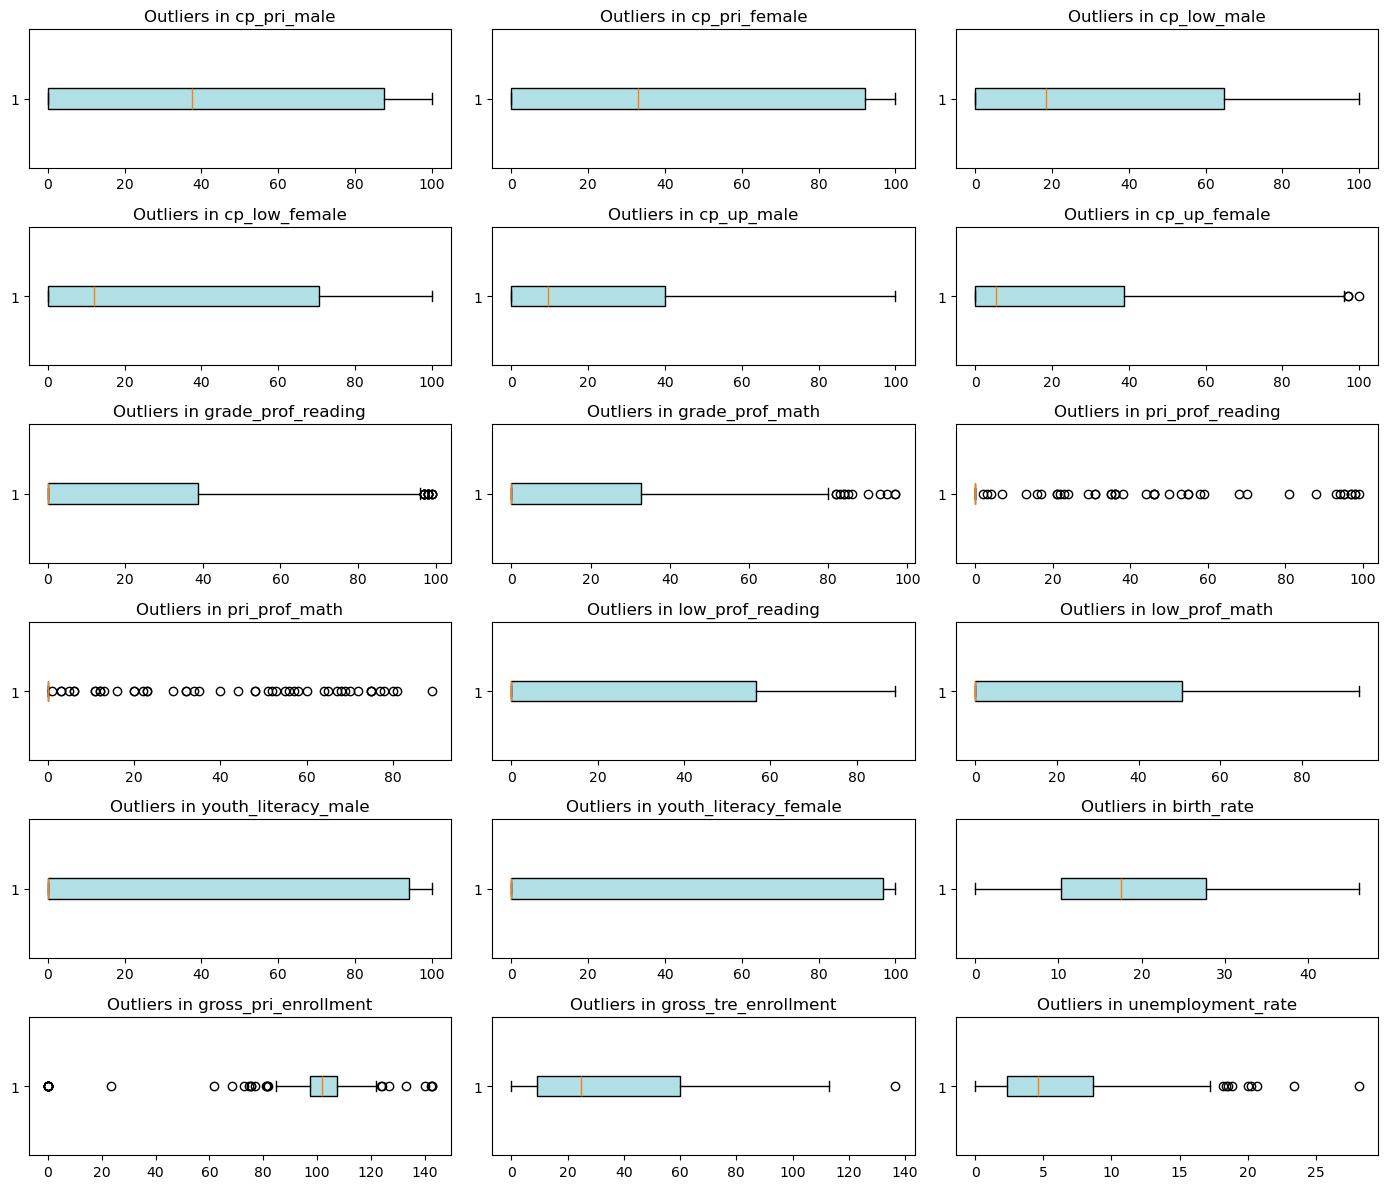


shape of the dataset before outlier remeval: (202, 30)

Final shape of the dataset after oulier removal: (64, 30)


In [15]:
# Save a copy of the original dataset before outlier removal
original_df = df.copy()

# List of numerical columns to check for outliers
numerical_columns = ['cp_pri_male', 'cp_pri_female', 'cp_low_male', 'cp_low_female', 'cp_up_male', 'cp_up_female', 'grade_prof_reading', 
                     'grade_prof_math', 'pri_prof_reading', 'pri_prof_math', 'low_prof_reading', 'low_prof_math', 'youth_literacy_male',
                     'youth_literacy_female', 'birth_rate', 'gross_pri_enrollment', 'gross_tre_enrollment', 'unemployment_rate']

# Plot boxplots for each numerical colummn
plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(6, 3, i+1)
    plt.boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor='powderblue'))
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()

print(f"\nshape of the dataset before outlier remeval: {df.shape}")

# Check and remove outliers using IQR
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers indices
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))].index

    # Remove outliers by updating the original dataframe
    df = df.drop(outliers)

# Check final shape of the DataFrame
print(f"\nFinal shape of the dataset after oulier removal: {df.shape}")

- We observed significant data loss after outlier removal, as the dataset size reduced from (202, 30) to (64, 30). Therefore, we decided to proceed without removing outliers.
- Instead, to imporve the quaility of the dataset, we decided to remove rows where 15 or more columns have zero values, as these rows contribute little meaningfull information.

In [26]:
# Restore the original DataFrame
df = original_df

# Remove rows where 15 or more columns have zero values
threshold = 15
df = df[(df == 0).sum(axis=1) < threshold]

# Verify the result after filtering
print(f"Shape of the DataFrame after removing rows with 15 or more columns having zeo values: {df.shape}")

Shape of the DataFrame after removing rows with 15 or more columns having zeo values: (151, 30)


# 2. Exploratory Data Analysis (EDA) and Data Visualisation

In [71]:
# Calculate descriptive statistics
df.describe()

,country_id,latitude,longitude,oosr_pre_male,oosr_pre_female,oosr_pri_male,oosr_pri_female,oosr_low_male,oosr_low_female,oosr_up_male,...,pri_prof_reading,pri_prof_math,low_prof_reading,low_prof_math,youth_literacy_male,youth_literacy_female,birth_rate,gross_pri_enrollment,gross_tre_enrollment,unemployment_rate
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,101.841060,26.250007,47.435636,23.238411,23.185430,5.986755,6.430464,10.549669,10.794702,23.576159,...,12.947020,13.748344,30.185430,28.344371,44.596026,43.629139,20.243377,100.070199,37.941722,6.749073
std,59.100377,16.926106,39.008662,26.774293,26.774217,9.472055,10.702965,14.225652,16.060020,21.961311,...,26.463758,25.089498,33.507294,31.983130,46.602744,46.401525,10.421383,20.335407,29.644654,5.196206
min,1.000000,0.023559,0.824782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.500000,12.714243,17.776481,2.000000,2.000000,0.000000,0.000000,0.500000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.800000,98.700000,11.550000,3.315000
50%,101.000000,23.424076,34.888822,11.000000,10.000000,2.000000,2.000000,4.000000,3.000000,19.000000,...,0.000000,0.000000,8.000000,11.000000,0.000000,0.000000,18.070000,101.900000,31.700000,5.140000
75%,149.500000,40.682112,72.920151,44.000000,40.500000,8.500000,9.000000,15.000000,13.000000,40.500000,...,5.500000,12.500000,59.000000,57.500000,98.000000,98.000000,29.510000,106.950000,63.500000,9.295000
max,202.000000,64.963051,175.198242,96.000000,96.000000,58.000000,67.000000,61.000000,70.000000,84.000000,...,99.000000,89.000000,89.000000,90.000000,100.000000,100.000000,46.080000,142.500000,136.600000,28.180000


## 1) Gender Disparity in Education Completion Rates Across Levels

Gender Comparison by Education Level:
             level  male_completion  female_completion
0          Primary        41.722772          42.128713
1  Lower Secondary        32.737624          33.168317
2  Upper Secondary        22.683168          23.069307 



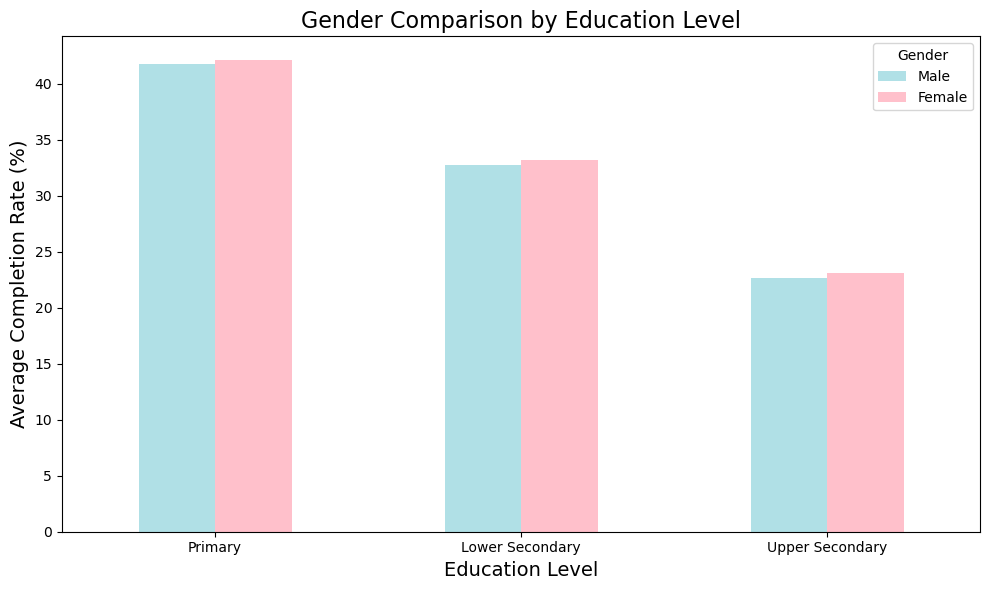

In [45]:
# Connect to SQLite database and execute a query to calculate the average male and female
query = '''
SELECT
    'Primary' AS level,
    AVG(cp_pri_male) AS male_completion,
    AVG(cp_pri_female) AS female_completion
FROM completion_rates

UNION ALL

SELECT
    'Lower Secondary' AS level,
    AVG(cp_low_male) AS male_completion,
    AVG(cp_low_female) AS female_compleiton
FROM completion_rates

UNION ALL

SELECT
    'Upper Secondary' AS level,
    AVG(cp_up_male) AS male_completion,
    AVG(cp_up_female) AS female_completion
FROM completion_rates;
'''

# Execure the SQL query and store the result in a pandas DataFrame
gender_comparison = pd.read_sql_query(query, conn)

# Print the DataFrame to check the results
print("Gender Comparison by Education Level:")
print(gender_comparison, "\n")

# Visualize the results as a bar chart
gender_comparison.set_index('level').plot(kind='bar', figsize=(10, 6), color=['powderblue', 'pink'])
plt.title("Gender Comparison by Education Level", fontsize=16)
plt.xlabel("Education Level", fontsize=14)
plt.xticks(rotation=0)
plt.ylabel("Average Completion Rate (%)", fontsize=14)
plt.legend(title="Gender", labels=["Male", "Female"])
plt.tight_layout()
plt.show()

### Description of Gender Disparity in Educaiton Completion Rates Across Levels
The bar chart visualizes the gender comparison in average educationcompletion rates across three education levels: Primary, Lower Secondary, and Upper Secondary.
1. Primary Level
- Both male and female completion rates are high, averaging around 42%.
- Females slightly outperform males at this level.

2. Lower Secondary Level
- There is a noticeable drops in average completion rates compared to the primary level.
- Male and Female completion rates are still relatively close, with females showing a marginally higher rate.

3. Upper Secondary Level
- The average completion rates further decline at this level.
- Females continue to maintain a slight edge over males.

4. Insights
- Across all education level, female students consistently show slightly higher completion rates than male students.
- However, both genders experiencing a significant drop in completion rates as the education level increases from Primary to Lower Secondary to Upper Secondary.

## 2) The Relationship Between Reading and Math Performance Across Education Levels

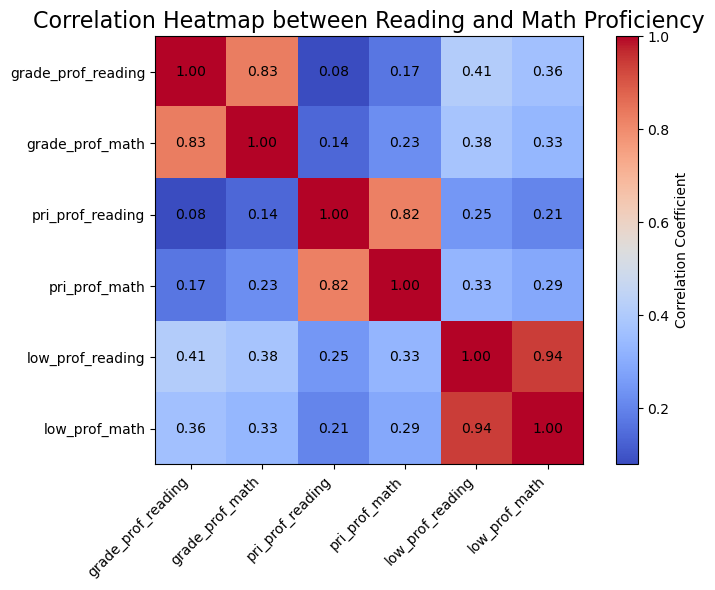

In [70]:
correlation= df[['grade_prof_reading', 'grade_prof_math', 'pri_prof_reading', 
                  'pri_prof_math', 'low_prof_reading', 'low_prof_math']].corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')

labels = correlation.columns
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(labels)), labels=labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, f'{correlation.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black', fontsize=10)

plt.title("Correlation Heatmap between Reading and Math Proficiency", fontsize=16)
plt.tight_layout()
plt.show()

### Description of The Relationship Between Reading and Math Performance Across Education Levels
The heatmap shows the relationship between reading and math proficiency scores across different education stages: Grade 2-3, Primary, and Lower Secondary.
1. Storing Correlation Within the Same Stage
- `pri_prof_reading` and `pri_prof_math`, as well as `grade_prof_reading` and `grade_prof_math`, show strong correlations of 0.82 and 0.83, respectively, meaning that students who perform well in reading at the primary or grade 2-3 level also tend to excel in math.
- `low_prof_reading` & `low_prof_math` has an even stonger correlation 0.94, showing that reading and math skills are closely aligned at the lower secondary level.

2. Weak Correlation Between Different Stages
- Reading and math skills at the grade 2-3 level are only weakly connected to primary and lower secondary levels.
- This suggests that early education performance may not strongly predict how students will perfom in later stages.

3. Insights
- Consistency Within Levels: Students who excel in one subject tend to excel in the other, especially within the same education stage.
- Strong Alignment at Higher Levels: The connection between reading and math becomes stronger as students advance to lower secondary education.
- Focus on Early Education: The weaker connection between grade-level and later stages suggests that support in early education could imporve learning outcomes as students progress.

## 3) Correlation Between Tertiary Enrollment Rate and Birth Rate

Correlation between Tertiary Enrollment Rate and Birth Rate: -0.68



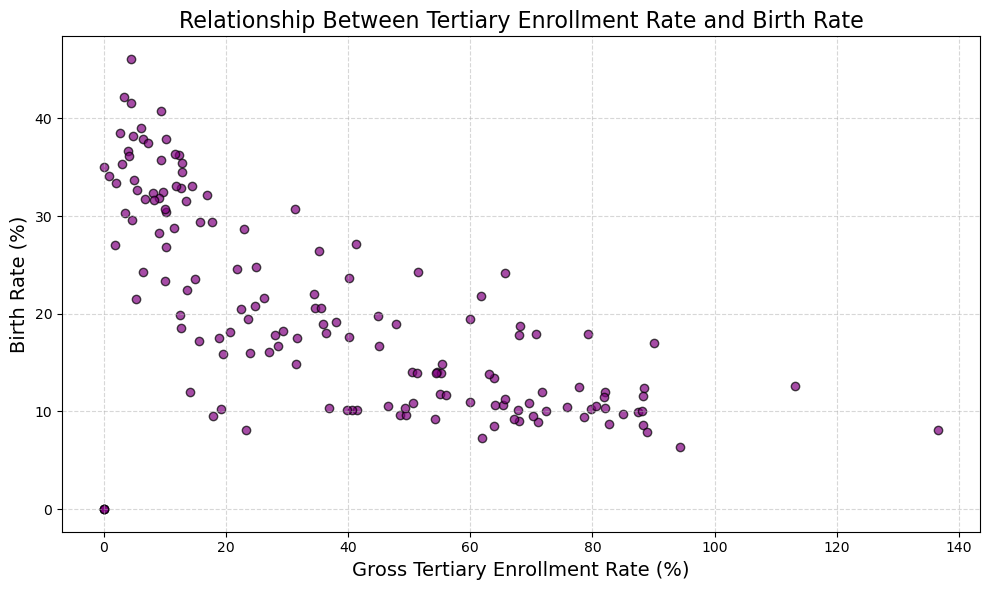

In [89]:
# Calculate the correlation coefficient
correlation = df['gross_tre_enrollment'].corr(df['birth_rate'])
print(f"Correlation between Tertiary Enrollment Rate and Birth Rate: {correlation:.2f}\n")

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['gross_tre_enrollment'], df['birth_rate'], color='purple', alpha=0.7, edgecolors='k')

# Add titles and labels
plt.title("Relationship Between Tertiary Enrollment Rate and Birth Rate", fontsize=16)
plt.xlabel("Gross Tertiary Enrollment Rate (%)", fontsize=14)
plt.ylabel("Birth Rate (%)", fontsize=14)

# Add grid for clarity
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Description of The Relationship Between Tertiary Enrollment Rate and Birth Rate
The scatter plot visualizes the relationship between Gross Tertiary Enrollment Rate and Birth Rate.
1. Negative Correlation
- The correlation coefficient is -0.68, indicating a strong negative relationship between tertiary education enrollment rates and birth rates.
- This suggests that countries with higher tertiary enrollment rates generally gave lower birth rates.

2. Pattern in Data
- A clear downward trend is visible in the scatter plot as tertiary enrollment rates increase, birth rates tend to decline.
- Countries with low tertiary enrollment rates (below 20%) exhibit a wide range of birth rates, often above 30%.
- In cotrast, countries with high tertiary enrollment rates (above 60%) show consistently lower birth rates, often below 20%.

3. Clusters
- The majority of data points are concentrated in the lower to mid-range for tertiary enrollment rates (0-60%) and birth rates between 10% and 40%.
- A few outliers exist where tertiary enrollment rates exceed 100%.

4. Insights
- Higher tertiary enrollment rates may be associated with societal factors such as delayed family planning, greator focus on education and career development, and improved access to education, especially for women.
- This trend aligns with global observations where education, particulary higher education, influences population growth rates.

To further investigate the relationship beween tertiary enrollment rates and birth rates geographically, we can use Plotly to create a choropleth map.

## 4) Global Analysis of Tertiary Enrollment Rates and Birth Rate

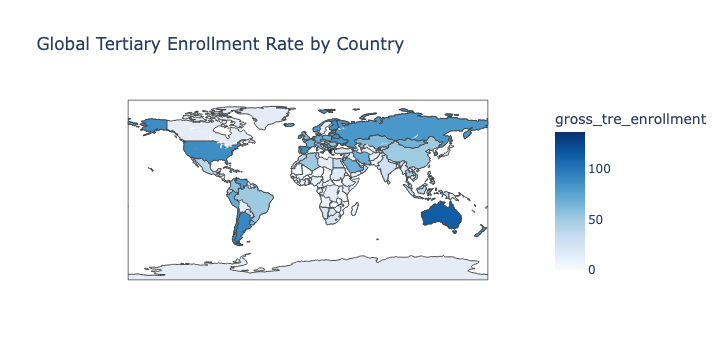

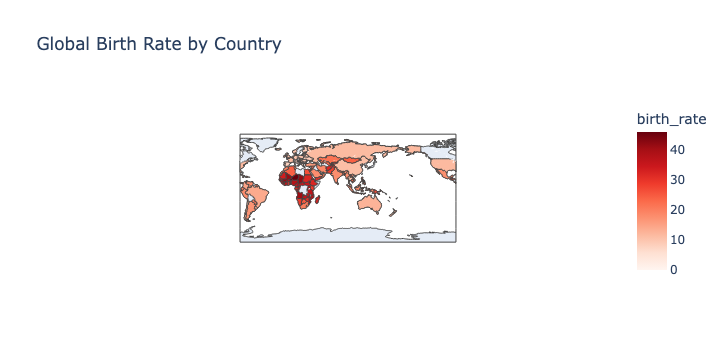

In [96]:
# Load necessary columns from the DataFrame
map_data = df[['country_name', 'gross_tre_enrollment', 'birth_rate']]

# Replace or drop rows with missing values
map_data = map_data.dropna(subset=['gross_tre_enrollment', 'birth_rate'])

# Create a choropleth map for Gross Tertiary Enrollment Rate
fig_tertiary = px.choropleth(
    map_data,
    locations = "country_name",
    locationmode = "country names",
    color = "gross_tre_enrollment",
    hover_name = "country_name",
    title = "Global Tertiary Enrollment Rate by Country",
    color_continuous_scale = "Blues"
)
fig_tertiary.show()

# Create a choropleth map for Birth Rate
fig_birth_rate = px.choropleth(
    map_data,
    locations = "country_name",
    locationmode = "country names",
    color = "birth_rate",
    hover_name = "country_name",
    title = "Global Birth Rate by Country",
    color_continuous_scale = "Reds"
)
fig_birth_rate.show()

### Description of Global Analysis of Tertiary Enrollment Rates and Birth Rates
The visualizations present a clear geographic comparison of tertiary education enrollment rates and birth rates across countries.

1. Global Tertiary Enrollment Rate
- Countries with higher tertiary enrollment rates are concentrated in developed regions, such as:
    - North America, Western Europe, and Austrailia exhibit enrollment rates exceeding 50%, with some reaching over 100%.
    - These regions often represent economically developed nations with strong education systems and accessibility to higher education.
- In contrast, lower tertiary enrollment rates are prevalent in many parts of Africa, South Asia, and parts of Latin America, highlighting potential challenges like limited access to highter education and socioeconomic barriers.

2. Global Birth Rate
- Countries with higher rates are concentrated in Sub-Saharn Africa and parts of South Asia.
    - The birth rates in regions frequently exceed 30-40%, reflecting trends seen in developing nations with limited access to education and healthcare.
- Conversly, countries with lower birth rates (below 10%) are primarily found in:
    - Europe, North America, and East Asia, which are regions with higher tertiary enrollment rates and advanced socioeconomic conditions.

3. Insights
- A negative relationship can be inferred between tertiary enrollment rates and birth rates
    - Regions with high tertiary enrollment generally display lower birth rates.
    - Conversely, regions with low tertiary enrollment tend to have higher birth rates.
- This aligns with the idea that increased access to education, particularly for women, is often associated with reduced birth rates due to factors such as career prioritixation and improved family planning awareness.

## 5) Global Unemployment Rate by Country

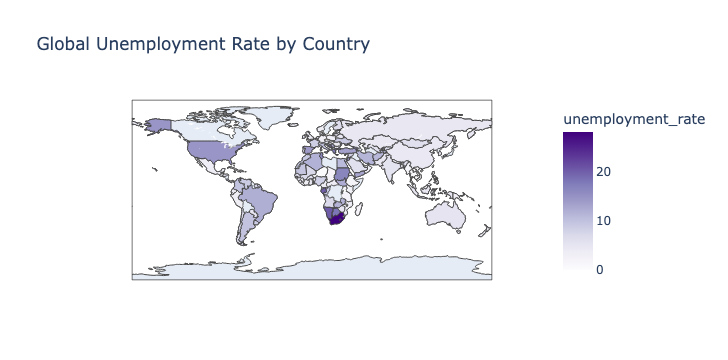

In [109]:
# Load necessary columns from the DataFrame
map_data_unemployment = df[['country_name', 'unemployment_rate']]

# Drop rows with missing data
map_data_unemployment = map_data_unemployment.dropna(subset=['unemployment_rate'])

# Create a choropleth map for unemployment rate
fig_unemployment= px.choropleth(
    map_data_unemployment,
    locations = "country_name",
    locationmode = "country names",
    color = "unemployment_rate",
    hover_name = "country_name",
    title = "Global Unemployment Rate by Country",
    color_continuous_scale = "Purples"
)

# Show the map
fig_unemployment.show()

### Description of Global Unemployment Rate bay Country
The map visualizes the global unemployment rate, with countries shaded in varing intensitie of purple.

1. High Unemployment Regions
- Countries in Sub-Sagaran Africa exhibit the highest unemployment rates, as indicated by the darkest purple shades
- Notably, South Africa stands out with one of the highest unemployment rates globally.

2. Moderate Unemployment Regions
- Regions in South America, parts of Europ, and parts of Asia display moderate unemployment rates, represented by lighter purple shades.

3. Low Unemployment Regions
- Countries in North America, Austrailia, and parts of Asia exhibit relatively low unemployment rates, reflected in the pale shades of purple.

4. Regional Trends
- High unemployment rates tend to cluster in certain developin regions, while developed economies generally show lower unemployment rates.

5. Insights
This map highlights stark disparities in unemployment rates across countries, which could be influenced by economic development, labor market policies, and social conditions. Further analysis could explore the relationship between unemployment and other socioeconomic factors like education or GDP.